In [8]:
import tensorflow as tf
import numpy as np
rng = np.random

In [11]:
learningRate = 0.01
training_steps = 100
displayStep = 5

In [4]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [6]:
n_samples

17

In [9]:
# 定义两个变量
W = tf.Variable(rng.randn(),name='W')
b = tf.Variable(rng.randn(),name='b')

In [13]:
def linear_regression(x):
    return W*x + b
def mean_square(y_pred,y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)
# 优化器，选用随机梯度下贱,学习率为0.01
optimizer = tf.optimizers.SGD(learning_rate=learningRate)

In [20]:
def run_optimization():
    with tf.GradientTape() as g:
        # gradientTape运行完成后会释放掉内存
        pred = linear_regression(X)
        loss = mean_square(pred,Y)
    # 设置梯度对应的权重   
    gradients = g.gradient(loss,[W,b])
    # 计算梯度并更新相关权重
    optimizer.apply_gradients(zip(gradients,[W,b]))
    

In [38]:
for step in range(1,training_steps+1):
    run_optimization()
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
    if step % displayStep == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 5, loss: 0.079026, W: 0.277597, b: 0.614739
step: 10, loss: 0.079001, W: 0.277440, b: 0.615853
step: 15, loss: 0.078976, W: 0.277284, b: 0.616961
step: 20, loss: 0.078951, W: 0.277129, b: 0.618062
step: 25, loss: 0.078926, W: 0.276974, b: 0.619156
step: 30, loss: 0.078902, W: 0.276821, b: 0.620244
step: 35, loss: 0.078879, W: 0.276668, b: 0.621325
step: 40, loss: 0.078855, W: 0.276517, b: 0.622399
step: 45, loss: 0.078832, W: 0.276366, b: 0.623467
step: 50, loss: 0.078809, W: 0.276217, b: 0.624529
step: 55, loss: 0.078786, W: 0.276068, b: 0.625584
step: 60, loss: 0.078764, W: 0.275920, b: 0.626633
step: 65, loss: 0.078741, W: 0.275773, b: 0.627675
step: 70, loss: 0.078720, W: 0.275627, b: 0.628711
step: 75, loss: 0.078698, W: 0.275481, b: 0.629741
step: 80, loss: 0.078677, W: 0.275337, b: 0.630764
step: 85, loss: 0.078656, W: 0.275193, b: 0.631782
step: 90, loss: 0.078635, W: 0.275051, b: 0.632793
step: 95, loss: 0.078614, W: 0.274909, b: 0.633798
step: 100, loss: 0.078594, W: 0.

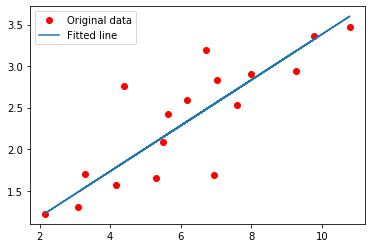

In [40]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()